In [44]:
from geopandas import gpd

In [45]:
data = gpd.read_file('/home/robert/data/ca-water-challenge/hr2w/violation.geojson')

In [46]:
data['ANALYTE_NA'].value_counts()

ARSENIC                          74
TTHM                             63
TOTAL HALOACETIC ACIDS (HAA5)    30
NITRATE                          30
SWTR                             29
TURBIDITY                        18
COMBINED URANIUM                 15
CHLORINE                         10
IESWTR                           10
1,2,3-TRICHLOROPROPANE            6
FLUORIDE                          5
NITRATE-NITRITE                   4
GROSS ALPHA PARTICLE ACTIVITY     3
LT2ESWTR                          2
TRICHLOROETHYLENE                 2
GROUNDWATER RULE                  1
BROMATE                           1
NITRITE                           1
PERCHLORATE                       1
URANIUM-238                       1
CHLORAMINE                        1
Name: ANALYTE_NA, dtype: int64

In [47]:
missing_data_indices = data.MCL == ''

In [48]:
data = data.loc[~missing_data_indices].copy()

In [49]:
groups = data.groupby('ANALYTE_NA')

In [50]:
data['ANALYTE_NA'].value_counts()

ARSENIC                          67
TTHM                             56
NITRATE                          29
TOTAL HALOACETIC ACIDS (HAA5)    27
COMBINED URANIUM                 15
1,2,3-TRICHLOROPROPANE            6
FLUORIDE                          5
NITRATE-NITRITE                   4
GROSS ALPHA PARTICLE ACTIVITY     3
URANIUM-238                       1
PERCHLORATE                       1
BROMATE                           1
TRICHLOROETHYLENE                 1
Name: ANALYTE_NA, dtype: int64

In [51]:
for i, group in groups:
    print(i)
    print(group[['MCL', 'RESULT']].head(), end='\n\n')

1,2,3-TRICHLOROPROPANE
               MCL         RESULT
74   0.000005 MG/L  0.000018 MG/L
129  0.000005 MG/L  0.000028 MG/L
198     0.005 UG/L     0.011 UG/L
272     0.005 UG/L    0.0087 UG/L
274  0.000005 MG/L  0.000010 MG/L

ARSENIC
           MCL      RESULT
2   0.010 MG/L   .014 MG/L
8   0.010 MG/L  0.030 MG/L
9   0.010 MG/L  0.032 MG/L
13  0.010 MG/L  0.035 MG/L
26  0.010 MG/L  0.038 MG/L

BROMATE
            MCL      RESULT
165  0.010 MG/L  0.022 MG/L

COMBINED URANIUM
         MCL       RESULT
12  20 PCI/L   20.5 PCI/L
42  20 PCI/L  20.48 PCI/L
57  20 PCI/L     21 PCI/L
58  20 PCI/L     23 PCI/L
81  20 PCI/L     37 PCI/L

FLUORIDE
          MCL      RESULT
109  2.0 MG/L    2.6 MG/L
161  2.0 MG/L    2.1 MG/L
178  2.0 MG/L    8.2 MG/L
181  2.0 MG/L   4.56 MG/L
261  2.0 MG/L  2.385 MG/L

GROSS ALPHA PARTICLE ACTIVITY
          MCL       RESULT
41   15 PCI/L  20.15 PCI/L
80   15 PCI/L  17.65 PCI/L
186  15 PCI/L  85.75 PCI/L

NITRATE
           MCL     RESULT
10     10 MG/L    11 MG

In [53]:
mcl_values, mcl_units = [], []
res_values, res_units = [], []
for i, row in data.iterrows():
    mcl_value, mcl_unit = row['MCL'].split(' ', maxsplit=1)
    res_value, res_unit = row['RESULT'].split(' ', maxsplit=1)
    mcl_values.append(float(mcl_value))
    mcl_units.append(mcl_unit)
    res_values.append(float(res_value))
    res_units.append(res_unit)

In [54]:
set(res_units)

{'MG/L', 'PCI/L', 'UG/L'}

In [55]:
set(mcl_units)

{'MG/L', 'PCI/L', 'UG/L'}

In [41]:
set(mcl_values)

{5e-06, 0.005, 0.01, 0.06, 0.08, 2.0, 6.0, 10.0, 15.0, 20.0, 45.0, 60.0, 80.0}

In [56]:
data['result_value'] = res_values
data['mcl_value'] = mcl_values

In [78]:
data['proportion_mcl'] = data.result_value / data.mcl_value

In [84]:
with open('/home/robert/data/ca-water-challenge/hr2w/violations_proportion.geojson', 'w') as f:
    f.write(data.to_json())

In [71]:
%matplotlib inline

In [72]:
import matplotlib.pyplot as plt

In [73]:
groups = data.groupby('ANALYTE_NA')

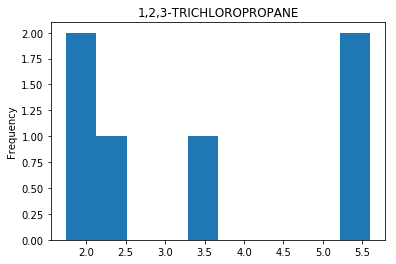

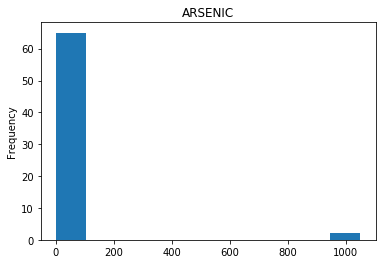

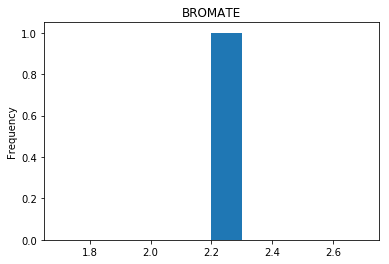

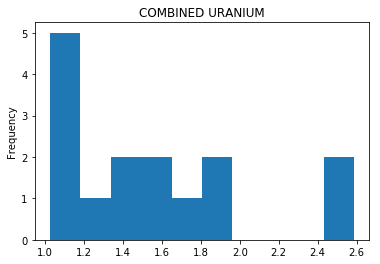

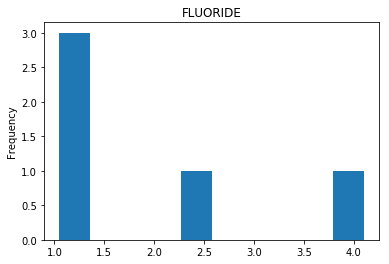

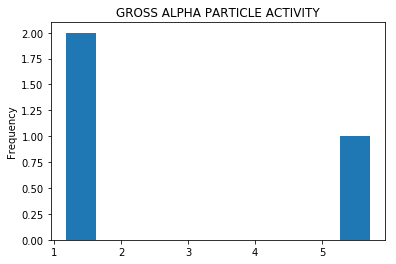

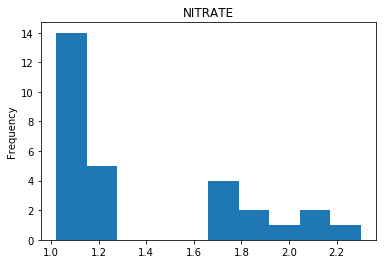

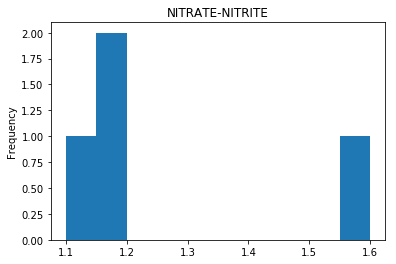

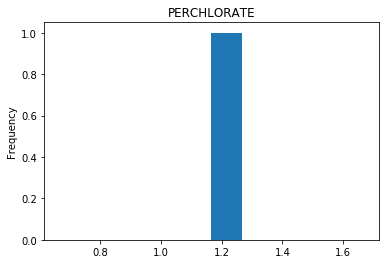

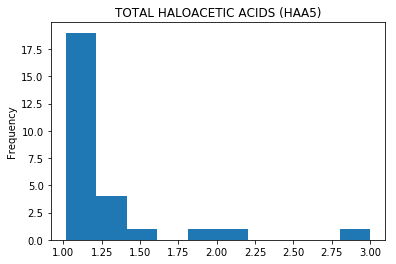

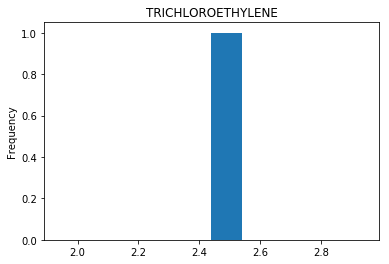

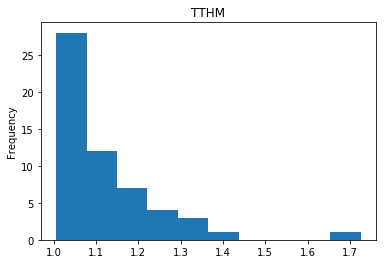

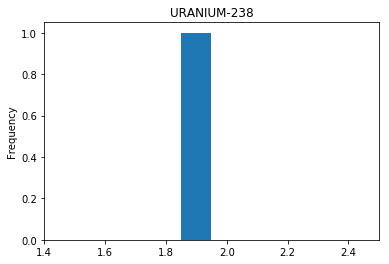

In [77]:
for group_name, group in groups:
    fig, ax = plt.subplots()
    group.percent_mcl.plot.hist(ax=ax)
    _ = ax.set_title(group_name)